In [7]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
RESULTS_FOLDER = "../../data/input_cost_analysis"
FIGURE_FOLDER = "../../figures"

In [13]:
# read all the results
df = pd.DataFrame()
for filename in os.listdir(RESULTS_FOLDER):
    input_cost = float(filename.split('=')[1][:-4])
    if input_cost == 0.01:
        continue
    full_filename = f"{RESULTS_FOLDER}/{filename}"
    df_i = pd.read_csv(full_filename)
    df_i["input_cost"] = input_cost
    df = df.append(df_i, ignore_index=True)
df = df.drop("Unnamed: 0", axis=1)

In [14]:
model_names = {
    "hill_climbing": "Hill-Climbing",
    "sparse_lqr": "Sparse LQR",
    "sparse_max_discrete": "Sparse Hill-Climbing (discrete)",
    "sparse_max_continuous": "Sparse Hill-Climbing (continuous)",
    "null_model_1": "Null Model 1",
    "null_model_2": "Null Model 2"
}

In [15]:
def make_model_line_plot(model_type, df=df):
    """
    Produce a line plot of performance as a function of input cost
    """
    df_model = df[df["model"] == model_type]
    df_model = df_model.sort_values(by="input_cost").reset_index()
    x_vals = df_model["input_cost"].drop_duplicates()
    y_vals = df_model.groupby("input_cost")["performance"].median()
    y_errs = df_model.groupby("input_cost")["performance"].quantile(0.625) - df_model.groupby("input_cost")["performance"].quantile(0.365)
    
    fig, ax = plt.subplots()
    ax.plot(x_vals, y_vals)
    ax.set_ylim(0, 700)
    ax.set_xscale("log")
    ax.set_xlabel("input cost")
    ax.set_ylabel("performance")
    ax.set_title(f"Performance by Input Cost: {model_names[model_type]}")
    
    return fig, ax

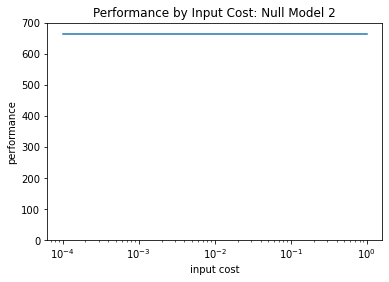

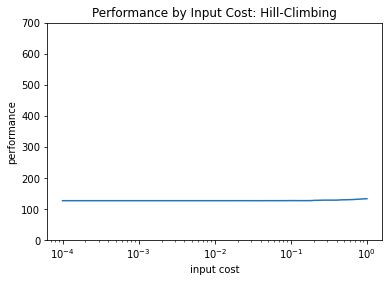

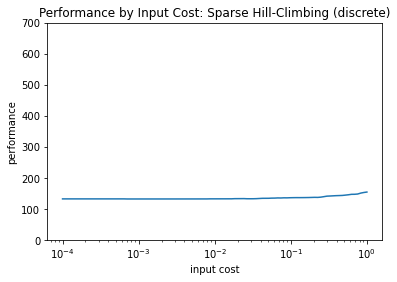

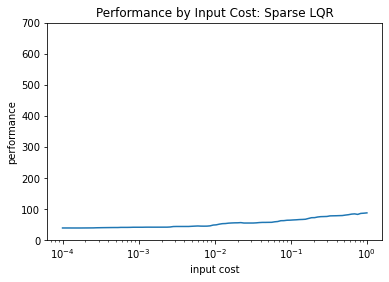

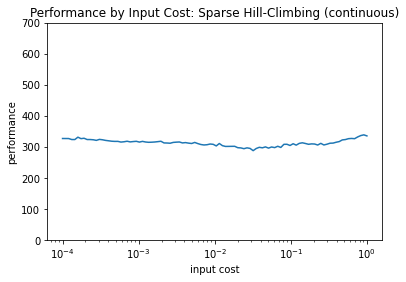

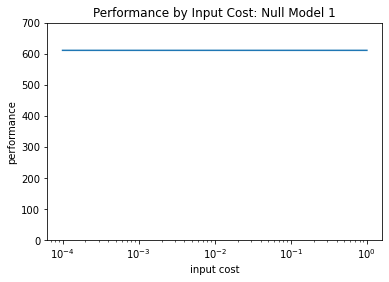

In [16]:
# Create all the figures and save them in files
for model_type in df["model"].drop_duplicates():
    fig, ax = make_model_line_plot(model_type)
    fig.savefig(f"{FIGURE_FOLDER}/input_cost_{model_type}.pdf")